In [5]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# 创建辅助函数画出SVM的决策边界
import numpy as np
import matplotlib.pyplot as plt
def plot_svc_decision_function(model,ax=None,plot_support=True):
#     画二维SVC决策函数
    if not ax:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    #创建评估模型的网格
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
#     print(xy)
    P=model.decision_function(xy).reshape(X.shape)#求出样本的支持向量
#     print(P)
    #画决策边界
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    #画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='b')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


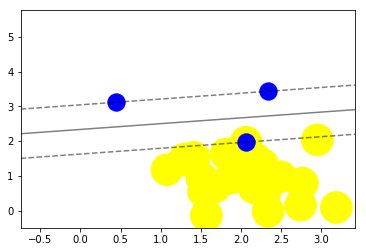

In [89]:
plt.scatter(X[:,0],X[:,1],c=y,s=y,cmap='autumn')
plot_svc_decision_function(model)